In [1]:
# ---------------------------------------------
# 1. Import Libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [2]:
# ---------------------------------------------
# 2. Upload & Load Data
# ---------------------------------------------
from google.colab import files

# Upload train.csv, test.csv, gender_submission.csv from Titanic folder
uploaded = files.upload()

# Load datasets
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Gender shape:", gender.shape)

train.head()


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
Train shape: (891, 12)
Test shape: (418, 11)
Gender shape: (418, 2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# ---------------------------------------------
# 3. Check Data Info & Missing Values
# ---------------------------------------------
train.info()
print("\nMissing values in training set:\n", train.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values in training set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E

In [4]:
# ---------------------------------------------
# 4. Handle Missing Values
# ---------------------------------------------
# Fill Embarked with mode (most common value)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Fill Age using median grouped by Sex & Pclass
age_medians = train.groupby(['Sex','Pclass'])['Age'].median()
def impute_age(row):
    if pd.isna(row['Age']):
        return age_medians.loc[row['Sex'], row['Pclass']]
    return row['Age']

train['Age'] = train.apply(impute_age, axis=1)

# Create a new feature: Cabin Available or Not
train['HasCabin'] = train['Cabin'].notna().astype(int)


In [5]:
# ---------------------------------------------
# 5. Feature Engineering for EDA
# ---------------------------------------------
# Family Size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Extract title from Name
train['Title'] = train['Name'].str.extract(r',\s*([^\.]+)\.')
title_map = {
    'Mlle':'Miss','Ms':'Miss','Mme':'Mrs',
    'Lady':'Rare','Countess':'Rare','Capt':'Rare','Col':'Rare','Don':'Rare',
    'Dr':'Rare','Major':'Rare','Rev':'Rare','Sir':'Rare','Jonkheer':'Rare','Dona':'Rare'
}
train['Title'] = train['Title'].replace(title_map)


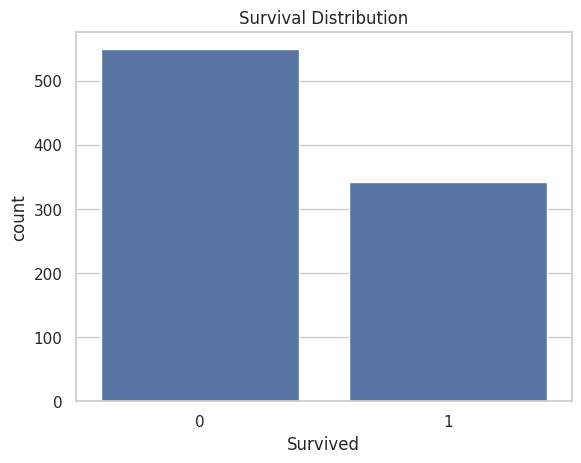

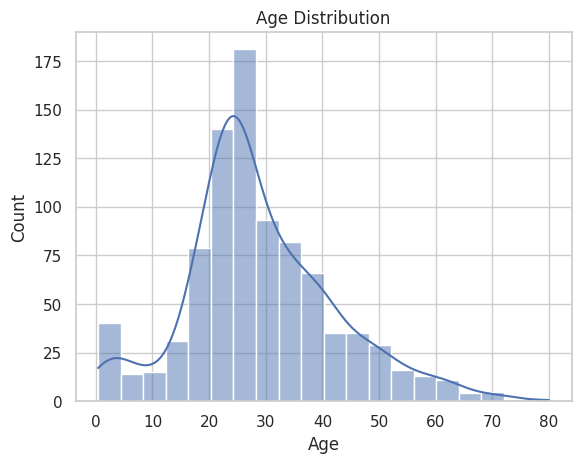

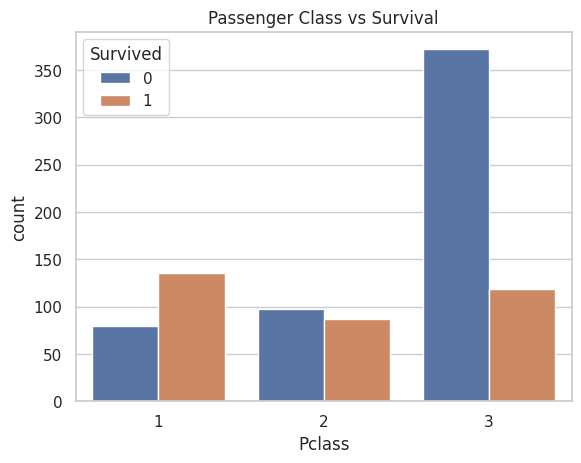

In [6]:
# ---------------------------------------------
# 6. Univariate Analysis
# ---------------------------------------------
# Target variable
sns.countplot(data=train, x="Survived")
plt.title("Survival Distribution")
plt.show()

# Age distribution
sns.histplot(train['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Passenger Class
sns.countplot(data=train, x="Pclass", hue="Survived")
plt.title("Passenger Class vs Survival")
plt.show()


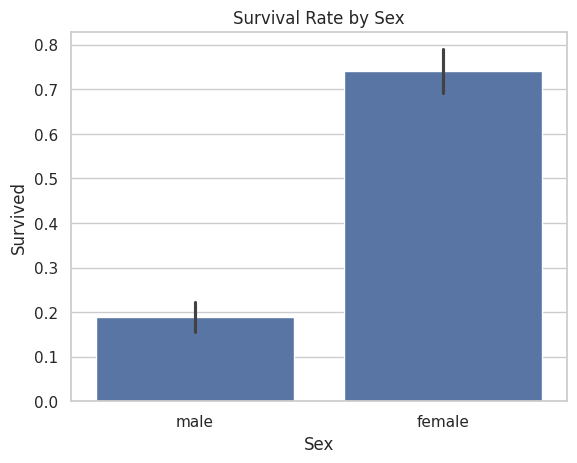

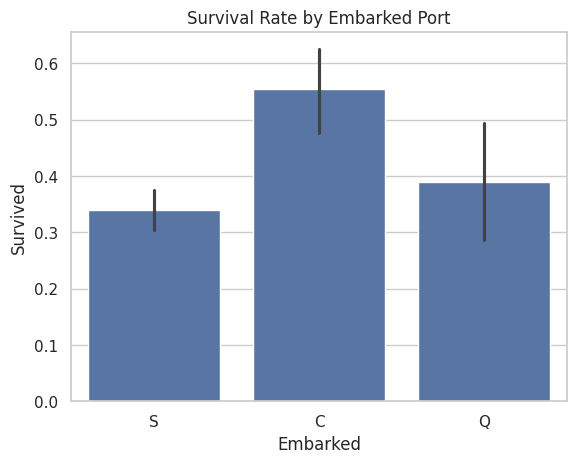

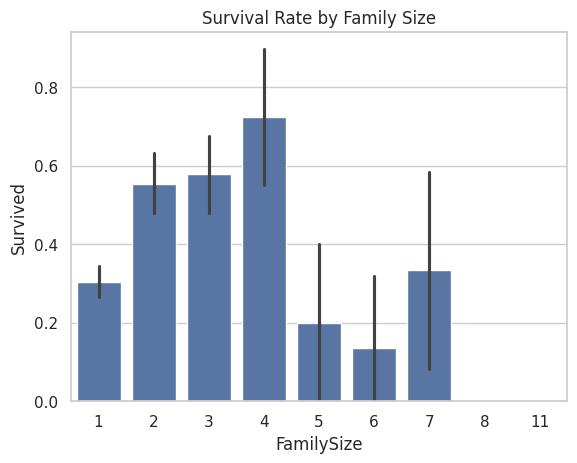

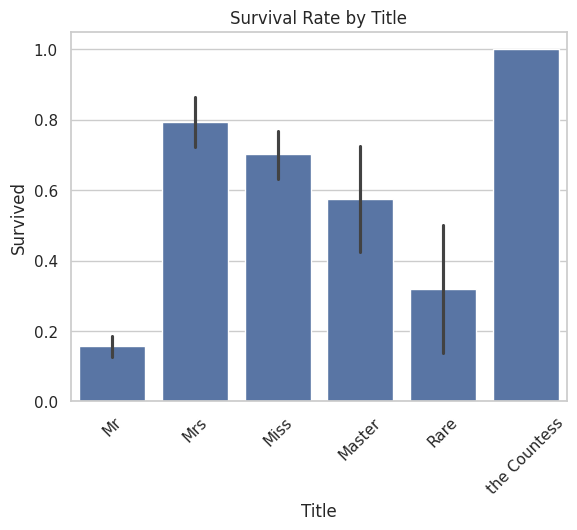

In [7]:
# ---------------------------------------------
# 7. Bivariate Analysis: Who Survived?
# ---------------------------------------------
# Survival by Sex
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Sex")
plt.show()

# Survival by Embarked
sns.barplot(x="Embarked", y="Survived", data=train)
plt.title("Survival Rate by Embarked Port")
plt.show()

# Survival by Family Size
sns.barplot(x="FamilySize", y="Survived", data=train)
plt.title("Survival Rate by Family Size")
plt.show()

# Survival by Title
sns.barplot(x="Title", y="Survived", data=train)
plt.title("Survival Rate by Title")
plt.xticks(rotation=45)
plt.show()


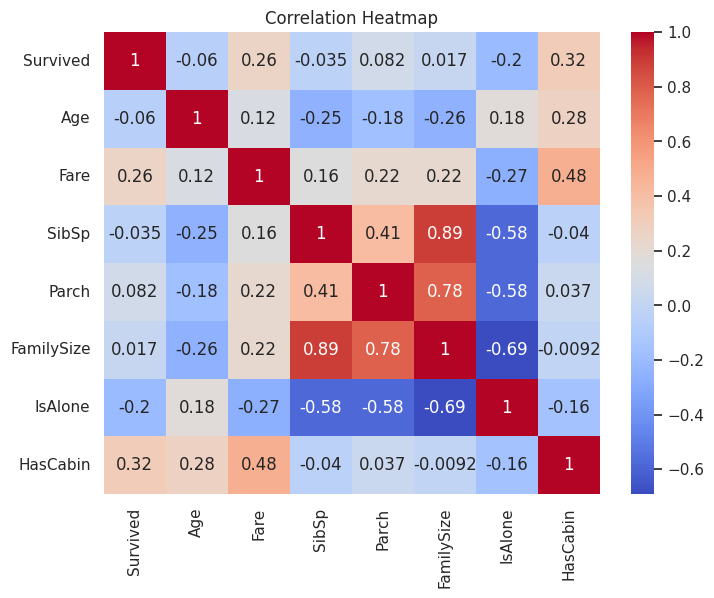

In [8]:
# ---------------------------------------------
# 8. Correlation Heatmap
# ---------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(train[['Survived','Age','Fare','SibSp','Parch','FamilySize','IsAlone','HasCabin']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


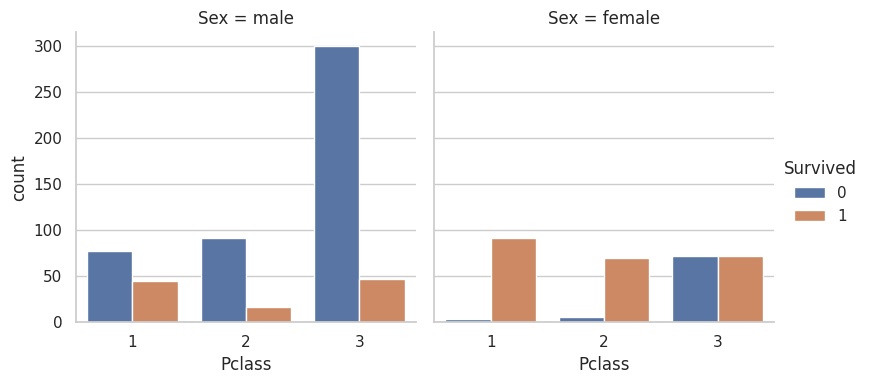

In [9]:
# ---------------------------------------------
# 9. Multivariate Visualization
# ---------------------------------------------
sns.catplot(x="Pclass", hue="Survived", col="Sex", data=train, kind="count", height=4)
plt.show()



**Titanic Dataset – EDA Summary & Conclusions**

 1.Data Cleaning

* Missing Values:

  Age → Filled with group median (by Sex & Pclass).

  Embarked → Filled with mode (most common port).

  Cabin → Too many missing → created a binary feature HasCabin.

* New Features: FamilySize, IsAlone, Title extracted from Name

**Key Findings**


1.Survival Distribution:

* About 38% of passengers survived.

* Survival was highly imbalanced (more deaths than survivors).

2.Gender:

* Females had a survival rate of ~74% vs ~19% for males.

* This is the strongest predictor of survival.

3.Passenger Class (Pclass):

* 1st Class survival ≈ 63%,

* 2nd Class ≈ 47%,

* 3rd Class ≈ 24%.

* Wealth/status influenced survival chances.

4.Age:

* Children (<12 yrs) had higher survival rates.

* Elderly (>60 yrs) had very low survival rates.

5.Family Size / IsAlone:

* People traveling alone had lower survival rates (~30%).

* Small families (2–4 members) had better chances.

* Very large families (>5) again had worse survival.

6.Embarked Port:

* Passengers who boarded at Cherbourg (C) survived more often than those at Southampton (S) or Queenstown (Q).

7.Cabin Information:

* Having a recorded cabin number was associated with a much higher chance of survival.

8.Titles (from Names):

* Social titles like ‘Mrs’, ‘Miss’, ‘Master’ showed higher survival.

* Rare titles (like Dr, Col, Rev) mostly had low survival.

**Conclusion**

*  The most important factors for survival were Sex, Pclass, and Age, followed by Family connections and Cabin availability.

*  The results reflect the “Women and children first” policy during the Titanic disaster.

*  Higher-class passengers had better access to lifeboats.

*  Traveling with a small family group improved chances, likely due to mutual support.